In [587]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [588]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [589]:
#Study the data distribution in each attribute, share your findings. (5 points)

In [590]:
#The next steps include , outlier treatment, imputation of missing values if any

In [591]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [592]:
#From the descriptive analysis we can see that there are no Nan values or categorical columns 
#as all the columns are showing descriptive statistic

In [593]:
#but if you check the experience column the minimum value is -3 , but experience cant be negative 
#so there is a chance that the data might be wrong

In [594]:
#Check for the negative values in experience column
bank_df[bank_df['Experience']<0].shape

(52, 14)

In [595]:
#we can see that there are 52 records , if we delete those records
#there is a chance we will loose the data  
#So we will replace those values with  another data

In [596]:
#find out the correlation between experience and other columns
bank_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [597]:
#As we can see from the above output , Age is highly correlated with experience 
#Even Education is correlated with experience
#So we run linear regression considering experience as output and Age and education as Input
#We take the negative 52 records as test data and perfrom linear regression

In [598]:
X=bank_df.iloc[:,0:3]

In [599]:
X['Education']=bank_df['Education']

In [600]:
X_train = X[X['Experience']>-1]

In [601]:
X_train=X_train.drop({'Experience','ID'},axis=1)

In [602]:
X_train.shape

(4948, 2)

In [603]:
X_test = X[X['Experience']<0]
X_test=X_test.drop({'Experience','ID'},axis=1)
X_test.shape

(52, 2)

In [604]:
y_train = X[X['Experience']>-1]
y_train =y_train.drop({'Age','Education','ID'},axis=1)
y_train.shape

(4948, 1)

In [605]:
y_test = X[X['Experience']<0]
y_test =y_test .drop({'Age','Education','ID'},axis=1)
y_test.shape

(52, 1)

In [606]:
x_id=X[X['Experience']<0]
x_id =x_id.drop({'Experience','Education'},axis=1)
x_id.shape

(52, 2)

In [607]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [608]:
y_pred = regressor.predict(X_test)

In [609]:
y_pred.shape

(52, 1)

In [610]:
y_pred

array([[-0.53473635],
       [-1.1553323 ],
       [-1.52935077],
       [ 2.44910691],
       [-0.78131382],
       [-0.16071788],
       [-0.53473635],
       [-0.53473635],
       [-1.1553323 ],
       [-0.78131382],
       [-0.53473635],
       [-1.77592824],
       [-1.1553323 ],
       [-0.78131382],
       [-1.52935077],
       [-1.77592824],
       [-1.1553323 ],
       [ 0.2133006 ],
       [-0.53473635],
       [ 0.2133006 ],
       [-0.53473635],
       [-1.77592824],
       [-1.52935077],
       [-0.16071788],
       [-2.14994672],
       [-2.14994672],
       [-1.1553323 ],
       [-1.52935077],
       [-2.14994672],
       [-0.16071788],
       [ 3.44372133],
       [-2.14994672],
       [-1.77592824],
       [ 0.83389654],
       [-0.53473635],
       [ 0.2133006 ],
       [-0.53473635],
       [-1.77592824],
       [-1.52935077],
       [-1.1553323 ],
       [-1.77592824],
       [-0.78131382],
       [-0.16071788],
       [ 0.2133006 ],
       [ 3.44372133],
       [-0

In [611]:
np.round(y_pred).max()

3.0

In [612]:
#Since we get even negative values after doing a round of regression , we take the maximum 
#value of experience and replace all the negative values with 3

In [613]:
bank_df['CleanExperience']=bank_df['Experience'].replace([-3,-2,-1],3)

In [614]:
bank_df['CleanExperience'].min()

0

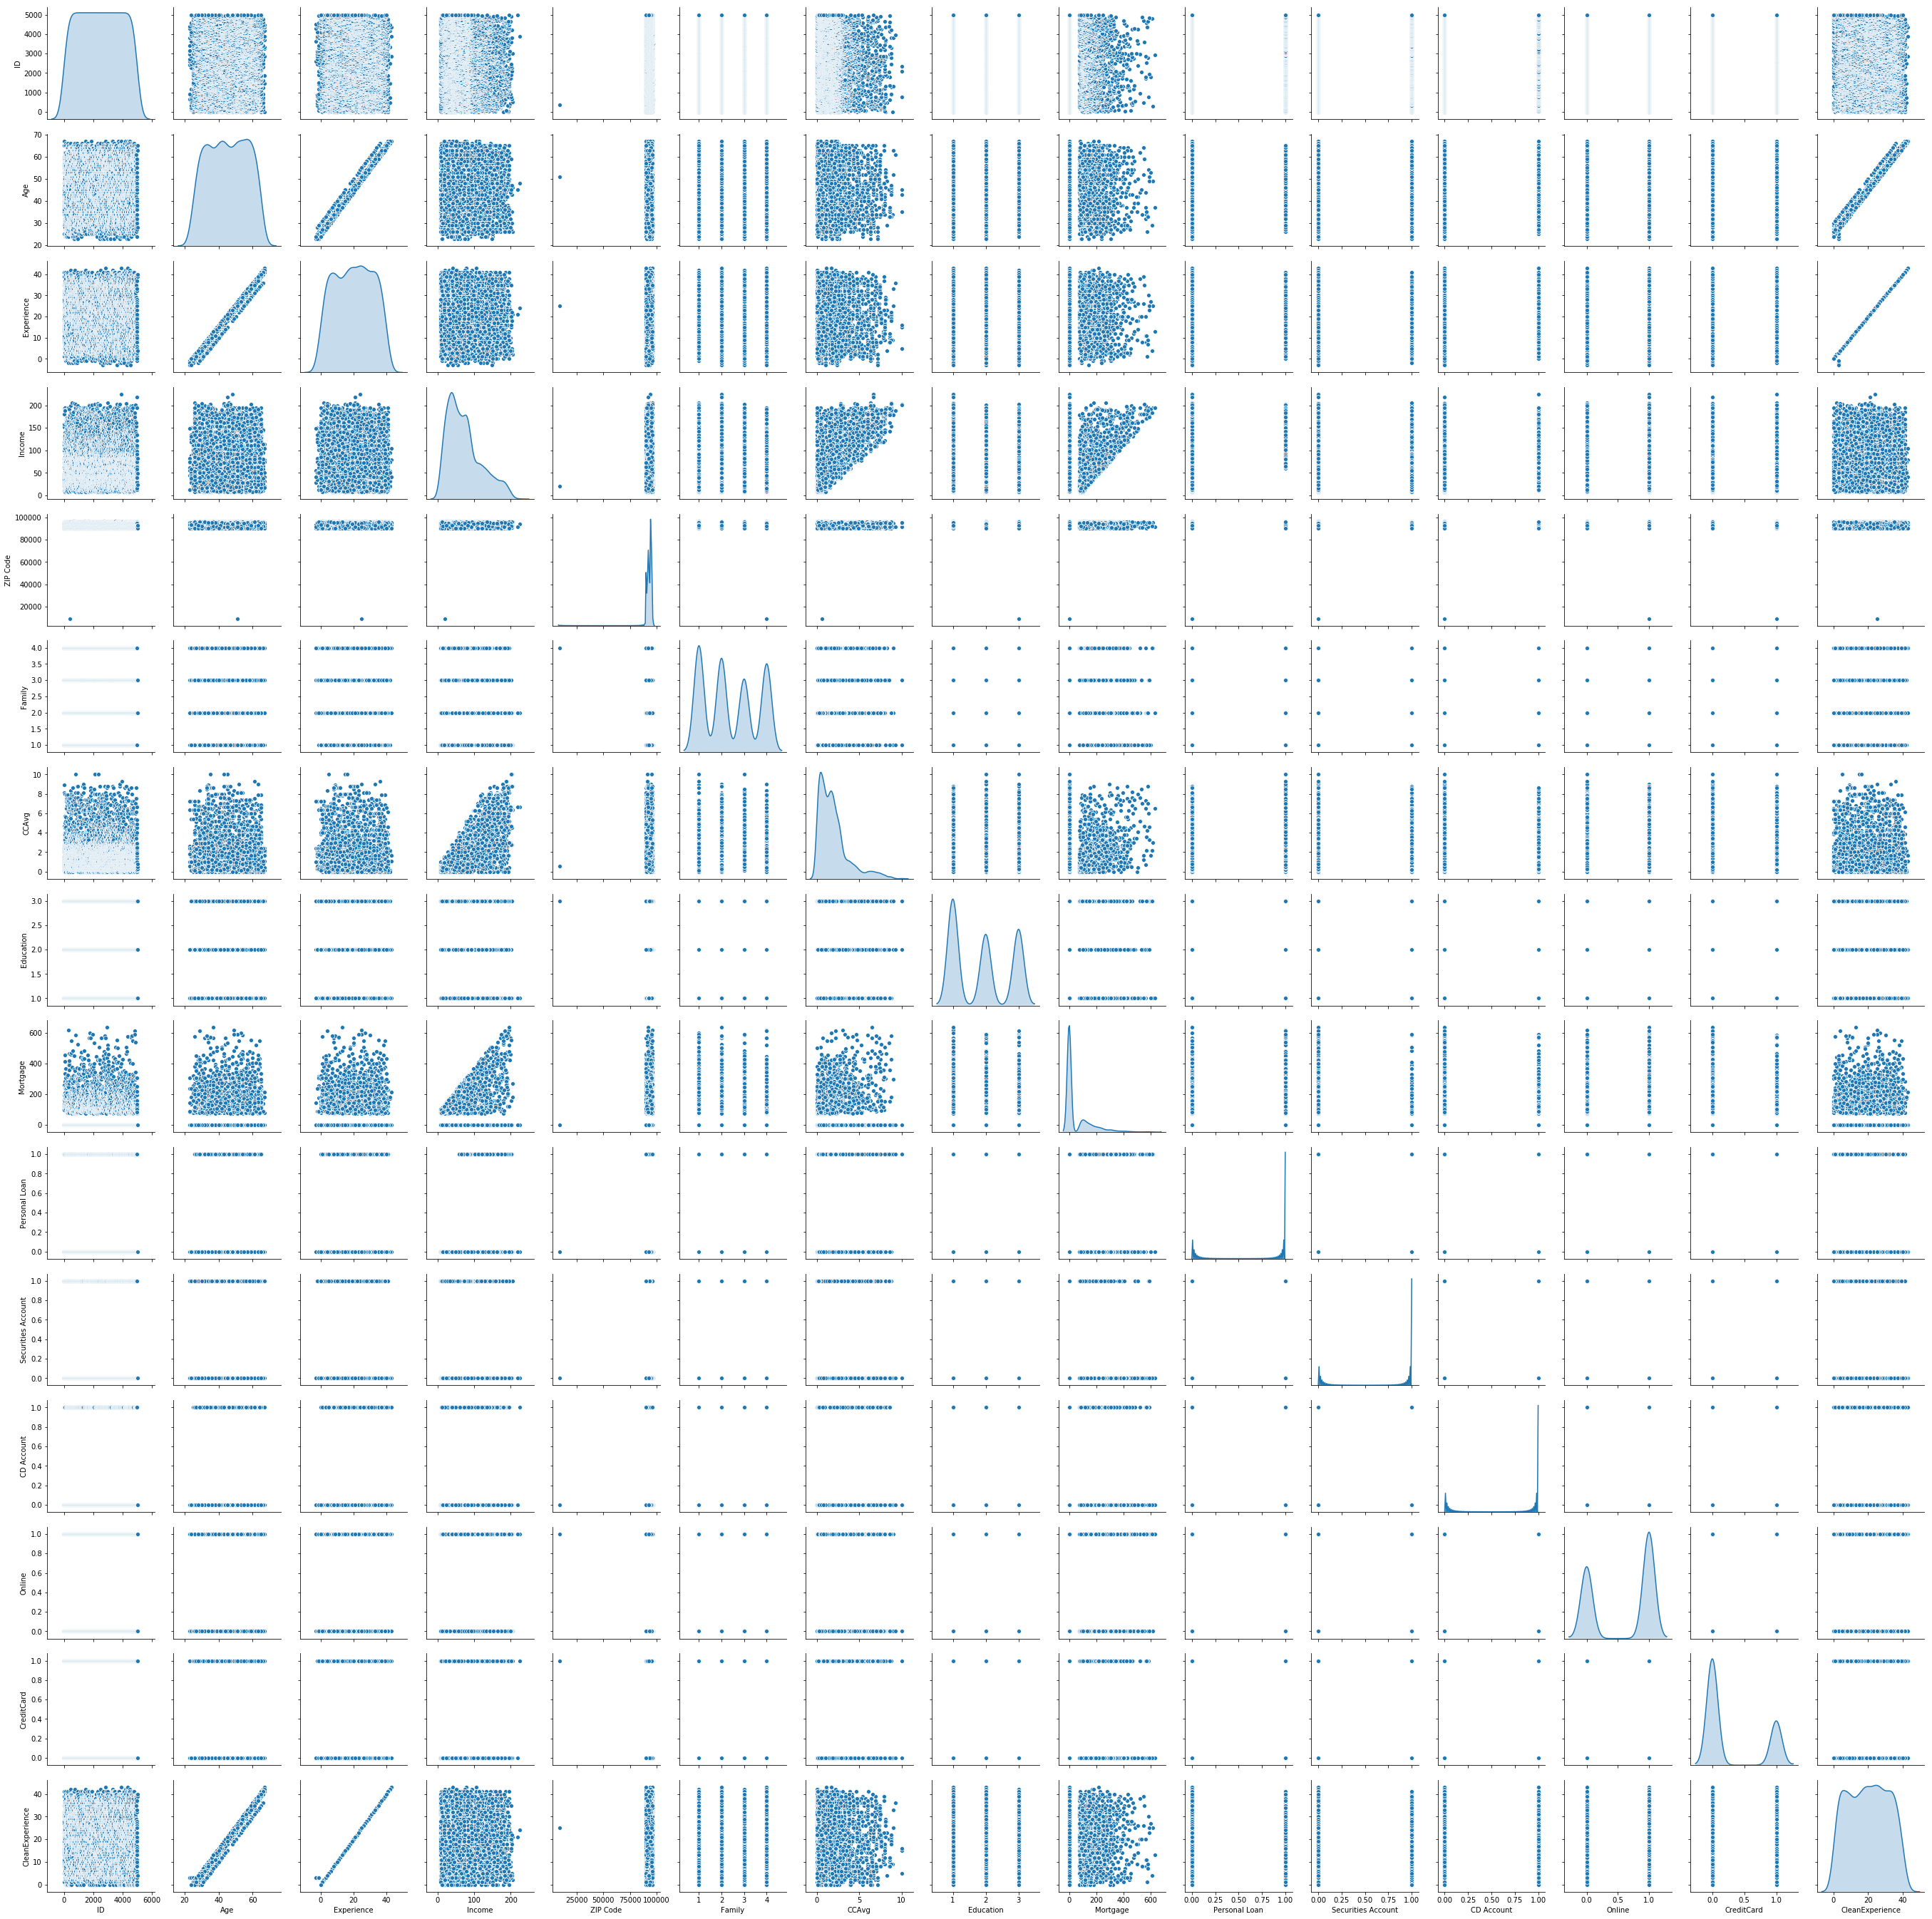

In [615]:
sns.pairplot(bank_df,diag_kind ='kde')

In [616]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [617]:
#Study the data distribution in each attribute, share your findings. (5 points)

In [618]:
#Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age.
#Here maen is equal to median
#Experience is  normally distributed.
#Here the mean is equal to median. There are negative values in the Experience. 
#There are negative valeus in experience wich is logically not possible to have negative valuesof experience.
#Around 52 records are there with negative experience and we will deal this records woth linea rregresssion 
#Income is positively skewed.Here mean is greater then median which indicates there is a long tail on the right side which tells us that 
#there is a good chance of having outliers.So outlier treatment is needed for this
#Same is the case with mortgage almost .75% of the individuals have a mortgage of less than 100K. However the max value is 635K
#Even here mean is greater than median, i.e., there are long tails on the right side of the distribution which indicated the existence of Outliers
#Outlier treatment is needed for this even
#CCAvg is also a positively skewed variable
#Rest of the variables are categorical variables which are numerical.
#We need to do one hot encoding for variables family and education as the model will assume that the categories are dependent and there is relationship between the values
#like (1<2<3<4).
#The other categorical variables are evenly distributed.
#Zip code and ID can be removed as it is not logical that customer will opt for a loan or not based on the ID number and ZIPCODE

In [619]:
#Get the target column distribution. Your comments

In [620]:
#Here the target column is "Personal Loan". Here the number of customers opted for loan is very less compare to numbers not opted for loan
#Income,CCavg,CD Account are highly correlated with the target vaiable "Personal Loan"

In [621]:
#Even though all are numberical columns , there are some categorical variables , we do one hot encoding 
#to ensure we get the best model
#Also Age, Experience,Income,Mortgage needs to be scaled for KNN as distance is vital

In [622]:
bank_df_corr=bank_df.corr()

In [623]:
bank_df_corr['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
CleanExperience      -0.008786
Name: Personal Loan, dtype: float64

In [624]:
#Here Id can be removed from the independent features as id of the customer will not tell whether he will accept the loan ornot
#Also Experience  and Age can be removed as it has low correlation or no correlation at all with target variable "personalloan"
#but we will remove the Experience as it alreaady had 52 bad records and we induced some values to it by linear regression
#so it is safe to remove Experience from Input


In [625]:
FamilyOHE=pd.get_dummies(bank_df['Family'],prefix = "Family")

In [626]:
bank_df_Imputed=pd.concat([bank_df,FamilyOHE],axis=1)

In [627]:
EducationOHE=pd.get_dummies(bank_df['Education'],prefix = "Education")

In [628]:
bank_df_Imputed=pd.concat([bank_df_Imputed,EducationOHE],axis=1)

In [629]:
bank_df_Imputed.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,...,Online,CreditCard,CleanExperience,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,...,0,0,19,0,0,1,0,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,...,0,0,15,1,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,...,0,0,9,1,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,2,0,0,...,0,1,8,0,0,0,1,0,1,0


In [630]:
#Drop Family,Education,ID,Experience,PersonalLoan,ZIPCODE and take the reamining as Inputs

In [631]:
X=bank_df_Imputed

In [632]:
X=bank_df_Imputed.drop({'ID','Experience','Family','Education','Personal Loan','ZIP Code'},axis=1)

In [633]:
X.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,CleanExperience,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,49,1.6,0,1,0,0,0,1,0,0,0,1,1,0,0
1,45,34,1.5,0,1,0,0,0,19,0,0,1,0,1,0,0
2,39,11,1.0,0,0,0,0,0,15,1,0,0,0,1,0,0
3,35,100,2.7,0,0,0,0,0,9,1,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,1,8,0,0,0,1,0,1,0


In [634]:
y=bank_df_Imputed['Personal Loan']

In [635]:
#Check for Outliers

In [636]:
Q1=X.quantile(0.25)
Q3=X.quantile(0.75)
IQR=Q3-Q1

In [637]:
Q3+(1.5*IQR)

Age                    85.0
Income                186.5
CCAvg                   5.2
Mortgage              252.5
Securities Account      0.0
CD Account              0.0
Online                  2.5
CreditCard              2.5
CleanExperience        60.0
Family_1                2.5
Family_2                2.5
Family_3                0.0
Family_4                0.0
Education_1             2.5
Education_2             2.5
Education_3             2.5
dtype: float64

In [638]:
Q1-(1.5*IQR)

Age                     5.0
Income                -49.5
CCAvg                  -2.0
Mortgage             -151.5
Securities Account      0.0
CD Account              0.0
Online                 -1.5
CreditCard             -1.5
CleanExperience       -20.0
Family_1               -1.5
Family_2               -1.5
Family_3                0.0
Family_4                0.0
Education_1            -1.5
Education_2            -1.5
Education_3            -1.5
dtype: float64

In [639]:
#incomde,Mortgage and CCAVg are considered for the outlier treatment as rest of the columns dont seem to have outliers

In [640]:
Q1mor=X['Mortgage'].quantile(0.25)
Q3mor=X['Mortgage'].quantile(0.75)
IQRmor=Q3mor-Q1mor

In [641]:
X[((X['Mortgage']<(Q1mor-(1.5*IQRmor)))|(X['Mortgage']>(Q3mor+(1.5*IQRmor))))]

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,CleanExperience,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
22,29,62,1.20,260,0,0,1,0,5,1,0,0,0,1,0,0
39,38,80,0.70,285,0,0,1,0,13,0,0,0,1,0,0,1
42,32,132,1.10,412,0,0,1,0,7,0,0,0,1,0,1,0
59,31,188,4.50,455,0,0,0,0,5,0,1,0,0,1,0,0
66,62,105,2.80,336,0,0,0,0,36,0,1,0,0,1,0,0
112,40,82,1.00,309,0,0,0,0,15,0,0,1,0,1,0,0
119,32,112,4.60,366,0,0,0,0,7,1,0,0,0,1,0,0
130,28,81,1.50,276,0,0,1,0,4,0,0,1,0,1,0,0
187,46,159,1.90,315,0,0,1,0,21,0,0,1,0,0,0,1
209,64,172,3.10,282,0,1,1,1,39,0,0,0,1,1,0,0


In [642]:
Q1CC=X['CCAvg'].quantile(0.25)
Q3CC=X['CCAvg'].quantile(0.75)
IQRCC=Q3CC-Q1CC

In [643]:
X[((X['CCAvg']<(Q1CC-(1.5*IQRCC)))|(X['CCAvg']>(Q3CC+(1.5*IQRCC))))]

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,CleanExperience,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
9,34,180,8.90,0,0,0,0,0,9,1,0,0,0,0,0,1
18,46,193,8.10,0,0,0,0,0,21,0,1,0,0,0,0,1
44,46,104,5.70,0,0,0,1,1,20,1,0,0,0,1,0,0
55,41,139,8.00,0,0,0,1,0,17,0,1,0,0,1,0,0
61,47,125,5.70,112,1,0,0,0,21,1,0,0,0,1,0,0
90,55,118,5.60,0,0,0,1,0,30,0,0,0,1,0,1,0
131,58,149,7.20,0,0,1,1,1,34,0,0,0,1,0,1,0
145,59,124,7.40,0,0,0,0,1,35,1,0,0,0,1,0,0
150,46,118,7.50,0,0,1,1,1,22,0,1,0,0,1,0,0
151,26,132,6.50,0,0,0,0,1,0,0,0,1,0,0,0,1


In [644]:
Q1Inc=X['Income'].quantile(0.25)
Q3Inc=X['Income'].quantile(0.75)
IQRInc=Q3Inc-Q1Inc

In [645]:
X[((X['Income']<(Q1Inc-(1.5*IQRInc)))|(X['Income']>(Q3Inc+(1.5*IQRInc))))]

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,CleanExperience,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
18,46,193,8.10,0,0,0,0,0,21,0,1,0,0,0,0,1
47,37,194,0.20,211,1,1,1,1,12,0,0,0,1,0,0,1
53,50,190,2.10,240,0,0,1,0,26,0,0,1,0,0,0,1
59,31,188,4.50,455,0,0,0,0,5,0,1,0,0,1,0,0
303,49,195,3.00,617,0,0,0,0,25,0,0,0,1,1,0,0
329,28,191,6.33,0,0,0,1,0,4,1,0,0,0,1,0,0
459,35,200,3.00,458,0,0,0,0,10,0,1,0,0,1,0,0
526,26,205,6.33,271,0,0,0,1,2,1,0,0,0,1,0,0
677,46,204,2.80,0,0,0,1,0,21,0,1,0,0,1,0,0
740,52,195,8.10,0,0,0,0,0,27,1,0,0,0,1,0,0


In [646]:
#Since the number of rows are more , we wil replace the outliers with the  to eliminate the outliers with (Q3+1.5*IQR) value

In [647]:
Q3Inc+(1.5*IQRInc)

186.5

In [648]:
X["Income_Cap"]=X['Income'].map(lambda x: 186 if x>186.5 else x)

In [649]:
Q3CC+(1.5*IQRCC)

5.2

In [650]:
X["CCAVG_cap"]=X["CCAvg"].map(lambda x: 5.2 if x>5.2 else x)

In [651]:
Q3mor+(1.5*IQRmor)

252.5

In [652]:
X["Mortgage_Cap"]=X["Mortgage"].map(lambda x:252 if x>252.5 else x)

In [653]:
X.describe()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,CleanExperience,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Income_Cap,CCAVG_cap,Mortgage_Cap
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,45.338400,73.774200,1.937938,56.498800,0.104400,0.06040,0.596800,0.294000,20.150800,0.294400,0.259200,0.202000,0.244400,0.419200,0.280600,0.300200,73.607800,1.831338,50.46560
std,11.463166,46.033729,1.747659,101.713802,0.305809,0.23825,0.490589,0.455637,11.389539,0.455818,0.438239,0.401532,0.429774,0.493478,0.449337,0.458391,45.602411,1.452215,82.93462
min,23.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.00000
25%,35.000000,39.000000,0.700000,0.000000,0.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.700000,0.00000
50%,45.000000,64.000000,1.500000,0.000000,0.000000,0.00000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1.500000,0.00000
75%,55.000000,98.000000,2.500000,101.000000,0.000000,0.00000,1.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,98.000000,2.500000,101.00000
max,67.000000,224.000000,10.000000,635.000000,1.000000,1.00000,1.000000,1.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,186.000000,5.200000,252.00000


In [654]:
X=X.drop({'CleanExperience','Income','Mortgage','CCAvg'},axis=1)

In [655]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0
Family_1,5000.0,0.294400,0.455818,0.0,0.0,0.0,1.0,1.0
Family_2,5000.0,0.259200,0.438239,0.0,0.0,0.0,1.0,1.0
Family_3,5000.0,0.202000,0.401532,0.0,0.0,0.0,0.0,1.0
Family_4,5000.0,0.244400,0.429774,0.0,0.0,0.0,0.0,1.0
Education_1,5000.0,0.419200,0.493478,0.0,0.0,0.0,1.0,1.0


In [656]:
#Scaling the features is important for distance calculation in KNN algorithm
from scipy.stats import zscore

In [657]:
X_Scaled=X.apply(zscore) 

In [658]:
X.shape

(5000, 15)

In [659]:
X_Scaled.shape

(5000, 15)

In [660]:
#Split the train and test data into 70:30 ration respectively
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.30, random_state=1)

In [661]:
#Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
#Print the confusion matrix for all the above models (5 points)

In [662]:
#After every model , I am printing the confusion matrix

In [663]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier


In [664]:
NNH = KNeighborsClassifier(n_neighbors= 100 , weights = 'distance' )

In [665]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='distance')

In [666]:
NNH.score(X_test, y_test)

0.9173333333333333

In [667]:
y_pred=NNH.predict(X_test)

In [668]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [669]:
from sklearn import metrics

In [670]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1351
           1       1.00      0.17      0.29       149

   micro avg       0.92      0.92      0.92      1500
   macro avg       0.96      0.58      0.62      1500
weighted avg       0.92      0.92      0.89      1500

[[1351    0]
 [ 124   25]]


In [671]:
#run grid search CV and find out the optimal neigbour param
from sklearn.model_selection import GridSearchCV

In [672]:
k = np.arange(1,10,1)
knn = KNeighborsClassifier(algorithm = 'kd_tree')
parameters = {'n_neighbors' : k}
GS = GridSearchCV(knn, parameters, cv=5)

In [673]:
GS.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [674]:
GS.best_params_

{'n_neighbors': 1}

In [675]:
GS.best_score_

0.9634285714285714

In [700]:
#For 10 neighbours , the accuracy is 94.4%
#For 1 neighbour , the accuracy is 96.6%, so we wll re run the model with nearest neighbbour as 1

In [677]:
NNH = KNeighborsClassifier(n_neighbors= 1 , weights = 'distance' )

In [678]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance')

In [679]:
NNH.score(X_test, y_test)

0.958

In [680]:
y_pred=NNH.predict(X_test)

In [681]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.88      0.67      0.76       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.92      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500

[[1337   14]
 [  49  100]]


In [682]:
#Recall has been imporved from 0.17 to 0.67 

In [683]:
#NaiveBayes Algorithm

In [684]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
print(GNB)

GaussianNB(priors=None, var_smoothing=1e-09)


In [685]:
y_pred= GNB.predict(X_test)

In [686]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1351
           1       0.59      0.61      0.60       149

   micro avg       0.92      0.92      0.92      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.92      0.92      0.92      1500

[[1289   62]
 [  58   91]]


In [687]:
#Recall here is 61%

In [688]:
print(GNB.score(X_test,y_test))

0.92


In [689]:
#Logistic Regression

In [690]:
from sklearn.linear_model import LogisticRegression

In [691]:
#Not taking the scaled variable here

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [693]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

C:\Users\rohith.kumar.bathala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [694]:
y_pred=logreg.predict(X_test)

In [695]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.89      0.62      0.74       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.93      0.81      0.86      1500
weighted avg       0.95      0.96      0.95      1500

[[1340   11]
 [  56   93]]


In [696]:
#Here the Recall for 1 is 62%

In [697]:
print(logreg.score(X_test,y_test))

0.9553333333333334


In [698]:
#Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [699]:
#FOr KNN Model, even though the score is almost same with the other models , the recall for 1 is 67%  if we consider 1 nearest neighbour
#i.e, it is able to recall 67% liable customers
#recall for 1 if we go for logistic regression is 62 %
#recall for 1 if we go naive bayes algorithmis 61%
#So for me KNN model gives the best output when compared to the other models even though the accuracy for all the models are more or less the saem
